In [1]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Max price in 7 days - 1st opening price
Y is divided into 2 groups, (negative & zero) or (positive value) 

Read the stock price and the reward rate

2016/06/01-2017/10/30
TWS100

In [2]:
TW100 = pd.read_excel("TW100NMB.xlsx")#Taiwan100 Stock Price Data

In [3]:
TW100Y = pd.read_excel("TW100Y.xlsx")

In [4]:
X_Test = pd.read_excel("Test_X.xlsx")

In [5]:
Y_Test = pd.read_excel("Test_Y.xlsx")

In [6]:
TW100.head()

,年月日,開盤價(元),收盤價(元),最高價(元),最低價(元),市值(百萬元),RSV,K值,D值,CAPM_Beta 一月
1101 台泥,2016/06/01,27.69,27.60,27.88,27.37,110396,0.938053,0.794810,0.480569,1.4018
1101 台泥,2016/06/02,27.60,27.69,27.79,27.51,110765,0.852713,0.814111,0.585316,1.3437
1101 台泥,2016/06/03,27.79,28.34,28.34,27.74,113349,1.368000,0.998741,0.661581,1.4654
1101 台泥,2016/06/04,28.34,28.25,28.52,28.15,112980,0.947368,0.981617,0.773968,1.1352
1101 台泥,2016/06/06,28.57,27.65,28.57,27.60,110580,0.445860,0.803031,0.843184,1.1715


In [7]:
X_Test.head()

,年月日,開盤價(元),收盤價(元),最高價(元),最低價(元),RSV,K值,D值,CAPM_Beta 一月
2313 華通,2016/06/01,14.84,15.57,15.71,14.84,1.703297,0.981588,0.570461,1.9814
2313 華通,2016/06/02,15.66,15.48,15.71,15.39,0.838028,0.933735,0.691552,1.9519
2313 華通,2016/06/03,15.57,15.44,15.66,15.39,0.773109,0.880193,0.754433,1.9087
2313 華通,2016/06/04,15.53,15.66,15.66,15.44,0.957983,0.906123,0.804996,1.9959
2313 華通,2016/06/06,15.57,15.39,15.71,15.25,0.719298,0.843848,0.817947,1.9060


In [8]:
TW100NT = TW100.drop(["年月日","市值(百萬元)"] ,axis=1)

In [9]:
X_TestSP = X_Test.drop(["年月日"] ,axis=1)

In [10]:
X_Train_SP = TW100NT.values

In [11]:
X_Test_SP = X_TestSP.values 

In [12]:
X_Test_SP

array([[  1.48400000e+01,   1.55700000e+01,   1.57100000e+01, ...,
          9.81588319e-01,   5.70461098e-01,   1.98140000e+00],
       [  1.56600000e+01,   1.54800000e+01,   1.57100000e+01, ...,
          9.33734936e-01,   6.91552377e-01,   1.95190000e+00],
       [  1.55700000e+01,   1.54400000e+01,   1.56600000e+01, ...,
          8.80193038e-01,   7.54432597e-01,   1.90870000e+00],
       ..., 
       [  3.95500000e+01,   3.93000000e+01,   3.95500000e+01, ...,
          1.08932686e-01,   2.57383848e-01,   5.49100000e-01],
       [  3.93500000e+01,   3.89500000e+01,   3.96000000e+01, ...,
          1.46507762e-02,   1.76472824e-01,   4.94800000e-01],
       [  3.95000000e+01,   3.92000000e+01,   3.97000000e+01, ...,
          1.09767184e-01,   1.54237611e-01,   4.93200000e-01]])

In [13]:
Y_Train_7DRR = TW100Y["7DaysRR"]               
Y_Train_MAX_30CP = TW100Y["7DaysMAXP-30thCP"]  
Y_Train_MAX_1OP = TW100Y["7DaysMAXP-1stOP"]    
Y_Train_MIN_30CP = TW100Y["7DaysMINP-30thCP"]  
Y_Train_MIN_1OP = TW100Y["7DaysMINP-1stOP"]    

In [14]:
Y_1_Train_7DRR = Y_Train_7DRR.values
Y_1_Train_MAX_30CP = Y_Train_MAX_30CP.values
Y_1_Train_MAX_1OP = Y_Train_MAX_1OP.values
Y_1_Train_MIN_30P = Y_Train_MIN_30CP.values
Y_1_Train_MIN_1OP = Y_Train_MIN_1OP.values

In [15]:
Y_Test.head()

,七天投報率,七天最大值-第一天開盤價,七天最小值減第一天開盤價
0,3.115326,0.68,-0.10
1,3.437534,0.68,-0.10
2,4.388719,1.03,-0.19
3,4.361332,1.12,-0.10
4,3.437465,1.03,-0.09


In [16]:
Y_Test_7DRR = Y_Test["七天投報率"]               
Y_Test_MAX_1OP = Y_Test["七天最大值-第一天開盤價"]  
Y_Test_MIN_1OP = Y_Test["七天最小值減第一天開盤價"]    

In [17]:
Y_1_Test_7DRR = Y_Test_7DRR.values
Y_1_Test_MAX_1OP = Y_Test_MAX_1OP.values
Y_1_Test_MIN_1OP = Y_Test_MIN_1OP

In [18]:
L = [];

In [19]:
for j in range(0,34500,345):
    for i in range(309):
        a = X_Train_SP[(i+j):(i+j+30)];
        L.append(a);
    L

In [20]:
L1 = np.reshape(L,(30900,240,1))

In [21]:
M = []

In [22]:
for j in range(0,17250,345):
    for i in range(309):
        a = X_Test_SP[(i+j):(i+j+30)];
        M.append(a);
    M

In [23]:
M1 = np.reshape(M,(15450,240,1))

In [24]:
from scipy import stats

In [28]:
stats.describe(Y_1_Test_7DRR)

DescribeResult(nobs=15450, minmax=(-21.031892421460562, 82.790806087219664), mean=0.56833214012905842, variance=23.793078507596395, skewness=1.9051584706113533, kurtosis=19.795073962554387)

In [26]:
#Catogorize y
Y_1_Train_7DRR[Y_1_Train_7DRR<=0] = 0  
Y_1_Train_7DRR[Y_1_Train_7DRR>0] = 1   

In [34]:
#Catogorize y 
Y_1_Test_7DRR[Y_1_Test_7DRR<=0] = 0   
Y_1_Test_7DRR[Y_1_Test_7DRR>0] = 1   

(array([ 7135.,  8315.]), array([0, 1, 2]), <a list of 2 Patch objects>)

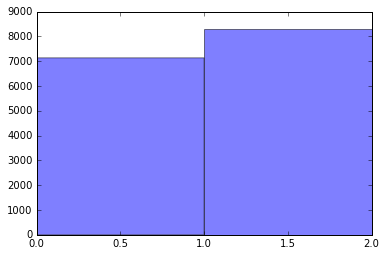

In [37]:
%matplotlib inline
#開始觀察資料決定區間
bins = np.arange(0, 3, 1)
plt.hist(Y_1_Test_7DRR, bins = bins, alpha = 0.5)

In [38]:
#將Ｙ轉換型態
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(Y_1_Train_7DRR,2)
y_test_trans = np_utils.to_categorical(Y_1_Test_7DRR,2)

Using TensorFlow backend.


### Build the model

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [40]:
model = Sequential()
model.add(Conv1D(64, 8, activation='relu', input_shape=(L1.shape[1],L1.shape[2])))
model.add(Conv1D(64, 8, activation='relu'))
#model.add(MaxPooling1D(8))
#model.add(Conv1D(128, 8, activation='relu'))
#model.add(Conv1D(128, 8, activation='relu'))
#model.add(GlobalAveragePooling1D())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(y_train_trans.shape[1], activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 233, 64)           576       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 226, 64)           32832     
_________________________________________________________________
flatten_1 (Flatten)          (None, 14464)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 28930     
Total params: 62,338.0
Trainable params: 62,338.0
Non-trainable params: 0.0
_________________________________________________________________


In [41]:
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [43]:
model.fit(L1, y_train_trans, batch_size=16, epochs=5, validation_data=(M1, y_test_trans))

Train on 30900 samples, validate on 15450 samples
Epoch 1/5
30900/30900 [==============================] - 58s - loss: nan - acc: 0.4758 - val_loss: nan - val_acc: 0.4618
Epoch 2/5
30900/30900 [==============================] - 57s - loss: nan - acc: 0.4758 - val_loss: nan - val_acc: 0.4618
Epoch 3/5
30900/30900 [==============================] - 61s - loss: nan - acc: 0.4758 - val_loss: nan - val_acc: 0.4618
Epoch 4/5
30900/30900 [==============================] - 63s - loss: nan - acc: 0.4758 - val_loss: nan - val_acc: 0.4618
Epoch 5/5
30900/30900 [==============================] - 61s - loss: nan - acc: 0.4758 - val_loss: nan - val_acc: 0.4618


In [55]:
score = model.evaluate(M1, y_test_trans)
score

15360/15450 [============================>.] - ETA: 0s

[nan, 0.46181229773848576]

In [63]:
pick = np.random.randint(1,15450, 20)

In [64]:
result = model.predict_classes(M1)

15424/15450 [============================>.] - ETA: 0s

In [73]:
from ipywidgets import interact_manual

In [77]:
def identify(testnumber):
    print(testnumber);
    print("神經網路判斷為：",result[testnumber]);
    print("正確答案是:",y_test_trans[testnumber]);

In [80]:
interact_manual(identify, testnumber=(0,15449))

9379
神經網路判斷為： 0
正確答案是: [ 0.  1.]


In [106]:
list = []
for i in range(15449):
    #if (result[i] == 0) and (Y_1_Test_7DRR[i] == 0):
        #list.append(i);
    if (result[i] == 1) and (Y_1_Test_7DRR[i] == 1):
        list.append(i);

In [107]:
len(list)

0